# Problem 1
### a) 
Find the polynomial of lowest degree that agrees with the function f (x) = cos x at the nodes $x_0 =0, x_1 =\pi/4, \ and \ x_2 =3\pi/4.$


In [1]:
from math import pi,sqrt,cos
import numpy as np
from matplotlib import pyplot as plt
from numpy import e
%matplotlib inline

We are going to use the Lagrange Formula
$$P_2(x)=y_1\frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)}+y_2\frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)}+y_3\frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}$$


$x_1 = 0, x_2 = \pi/4,  x_3 = 3\pi/4$

$y_1 = cos(0) = 1, y_2 = cos(\pi/4) = \frac{\sqrt{2}}{2}, y_3 = cos(3\pi/4) = -\frac{\sqrt{2}}{2} $


Plugging this in we get, 
$$P_2(x) = 1\frac{(x-\pi/4)(x-3\pi/4)}{(0-\pi/4)(0-3\pi/4)}+\frac{\sqrt{2}}{2}\frac{(x-0)(x-3\pi/4)}{(\pi/4-0)(\pi/4-3\pi/4)}-\frac{\sqrt{2}}{2}\frac{(x-0)(x-\pi/4)}{(3\pi/4-0)(3\pi/4-\pi/4)} $$

In [2]:
c_1 = 1/((-pi/4)*(-(3*pi)/4))
c_2 = (sqrt(2))/(2*(pi/4)*(pi/4-3*pi/4))
c_3 = -(sqrt(2))/(((3*pi)/4)*((3*pi)/4-pi/4))
print(c_1,c_2,c_3)

0.5403796460924681 -0.5731591682507563 -0.3821061121671709


$$P_2(x) = .54037965(x-\pi/4)(x-3\pi/4)-0.573159183x(x-3\pi/4)-0.382106112x(x-\pi/4)$$

### b)
Without using the actual value of the cosine at any argument except the above three, use this polynomial to approximate cos(1), and compute an upper bound on the error in this approximation.


We are just going to calculate P_2(1)...

In [3]:
P_2 = .54037965*(1-pi/4)*(1-3*pi/4)-0.573159183*(1)*(1-3*pi/4)-0.382106112*(1)*(1-pi/4)
print("The approximated value of cos(1) = %s"%(P_2))

The approximated value of cos(1) = 0.5380415712171481


We need to determine the error for our polynomial...
$$f(x)-P_2(x) = \frac{(x-0)(x-\pi/4)(x-3\pi/4)}{3!}f'''(c) $$
where $0 \leq c \leq 3\pi/4 $
$$f(x)=cos(x) \rightarrow f'(x)=-sin(c) \rightarrow f''(x)=-cos(x) \rightarrow f'''(x)=sin(x)$$

Hence to maximize the error, we need to maximize the third derivative. This can be done by letting $c = 3\pi/4$.
Thus the error is,
$$e(x)=\left|\frac{(x-0)(x-\pi/4)(x-3\pi/4)}{3!}\frac{\sqrt(2)}{2}\right| $$

In [4]:
err_max = abs((sqrt(2)*(1-0)*(1-pi/4)*(1-3*pi/4))/(6*2))
print(err_max)

0.03429960841005762


Therefore the max error for x=1 is 0.03429960841005762

### c)
Compute the actual error in this approximation of cos(1), and compare to your result in part (b).


In [5]:
abs(cos(1)-P_2)

0.002260734650991636

Hence we are happy because this is less than the max error so the $P_2(x)$ we estimated is correct!

# Problem 2

Two quantities x and y are known to be related by the form $y = ae^x + be^{−x}$. (Aside: this is true for example if they come from a solution of the differential
equation d2y/dx2 = y).
For the following six x values (known exactly), y values have been measured, with most of the inaccuracy in the y values just due to rounding, but with a mistake in recording one of the y values; this gives the following table of values:


In [27]:
xdata = np.matrix([0,.2,.4,.6,.8,1.])
ydata = np.matrix([4.3,4.1245,4.1146,4.1382,4.5964,5.107])


### a)
Set up the least squares procedure for this pair of basis functions, and determine the best estimates of a and b in the least squares sense.

$$Ax = b$$


In [7]:
A = np.matrix(np.zeros((6,2)))
A[:,0] = np.exp(xdata.T)
A[:,1] = np.exp(-xdata.T)
print("Here is matrix A: \n %s"%(A))

Here is matrix A: 
 [[ 1.          1.        ]
 [ 1.22140276  0.81873075]
 [ 1.4918247   0.67032005]
 [ 1.8221188   0.54881164]
 [ 2.22554093  0.44932896]
 [ 2.71828183  0.36787944]]


In [67]:
b = np.matrix(ydata.T)
print("Here is our b matrix: \n %s"%(b))

Here is our b matrix: 
 [[ 4.3   ]
 [ 4.1245]
 [ 4.1146]
 [ 4.1382]
 [ 4.5964]
 [ 5.107 ]]


In [9]:
ATA = A.T.dot(A)
ATb = A.T.dot(b)
print("Here is our ATA matrix: \n %s"%(ATA))
print("Here is our ATb matrix: \n %s"%(ATb))

Here is our ATA matrix: 
 [[ 20.37957107   6.        ]
 [  6.           2.75807502]]
Here is our ATb matrix: 
 [[ 47.12797122]
 [ 16.65010212]]


Hence we have the normal equations:
$$ \left[ \begin{array}{cc} 20.37957107 & 6. \\ 6. & 2.75807502  \end{array} \right] \left[\begin{array}{c} x_1\\x_2\end{array} \right] = \left[\begin{array}{c} 47.12797122 \\16.65010212\end{array} \right] $$


In [64]:
ATA_inverse = ATA.I
x = ATA_inverse*(ATb)
a_val = x[0,0]
b_val = x[1,0]
print("a is ",a_val,"and b is",b_val)

a is  1.48858338542 and b is 2.79854671971


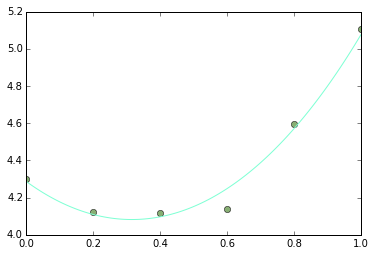

In [65]:
x_stuff = np.linspace(0,1,100)
def y(x):
    return 1.48858338542*e**(x)+2.79854671971*e**(-x)
plt.plot(xdata,ydata,"o",color="sage")
plt.plot(x_stuff,y(x_stuff),"-",color="aquamarine")

Based on this plot I would say this is a good fit!!

### b)
Check the accuracy by computing the error at each point, and using this, try to identify the point where the mistaken y value is.


To check the accuracy we have to check the residuals

In [75]:
## estimate array
values = np.matrix([1.48858338542,2.79854671971])
residual = b-A*values.T
print(residual)

[[ 0.01286989]
 [ 0.01508388]
 [ 0.01797258]
 [-0.11005078]
 [ 0.02602865]
 [ 0.03108303]]


Hence we can see that the fourth $y$ value has the worst error (corresponding to $x=.06$).

### c)
Propose a plausible replacement for the erroneous value.

In [76]:
y(.6)

4.248250776452348

According to the relationship between the two quantites the perfect $y$ value to choose would be $y=4.2483$. However stick with the appropriate error i would stick with an error between the two previous errors. 

In [77]:
0.02602865-0.01797258

0.008056070000000002

In [78]:
4.248250776452348+0.008056070000000002

4.256306846452349

So the best $y$ value to chose to go along with our errors would be $y=4.2563$.

# Problem 3
### a)
Derive the approximation of f′(x) of the form
f′(a) ≈ Af(a) + Bf(a + 2h) + Cf(a + 3h),
that is best the sense of having the highest possible degree of precision, p.
(Note that the value at a + h is missing!)


Once again we are going to do the degree of precision trik to solve for the unknown coefficients
We are going to guess that $f'(x)=Af(a)+Bf(a+2h)+Cf(a+3h)$.


$\underline{n=0}: f(x)=1 \rightarrow f'(a) = 0 = A+B+C$

$\underline{n=1}: f(x)=x-a \rightarrow f'(a) = 1 = 2hB+3hC $

$\underline{n=2}: f(x)=(x-a)^2 \rightarrow f'(a)=0 = 4hB+9hC \rightarrow C=\frac{-4}{9}B $
Hence after some solving we have,
$$A=\frac{-5}{6h} $$

$$B=\frac{3}{2h} $$

$$C=\frac{-2}{3h}$$

Hence $$f'(x) \approx \frac{-5}{6h}f(a)+\frac{3}{2h}f(a+2h)-\frac{2}{3h}f(a+3h) $$

$\underline{n=3}: f(x)=(x-a)^3 \rightarrow f'(a)=0 = 8hB+27hC \rightarrow C=\frac{-8}{27}B $
which is not the same as $\frac{-4}{9}$ so it does not work.

Therefore we have a degree of precision 2!




### b)
Using Taylor polynomials of degree p with error term, verify that this approximation has error $O(h^p)$.

Since we have a degree of precision 2 lets check out a taylor polynomail of degree two with its error term.
$$f(a+2h) = f(a) + 2hf'(a)+2h^2f''(a)+\frac{8}{6}h^3f'''(c_1) $$ 
$$f(a+2h) = f(a) + 3hf'(a)+\frac{9}{2}h^2f''(a)+\frac{27}{6}h^3f'''(c_2) $$ 

Thus we have, 
$$\frac{-5f(a)+9f(a)+18hf'(a)+18h^2f''(a)+12h^3f'''(c_1) -4f(a)-12hf'(a)-18h^2f''(a)-18h^3f'''(c_2)}{6h}$$
which becomes
$$\frac{6hf'(a)+12h^3f'''(c_1)-18h^3f'''(c_2)}{6h} = f'(a)+(2f'''(c_1)-3f'''(c_2))h^2 $$

Therefore we have an error of $h^2$ as required!

# Problem 4
The composite Simpson’s rule (which is fourth order accurate) has been used to
approximate a definite integral $I=\int^b_a f(x)dx$ with 10 and 20 intervals, giving the 
$$S_{10} = 7.38084362852$$
$$S_{20} = 7.35531055134$$


### a)
Use Richardson extrapolation to get a better approximation to the value $I$ of
this integral.


The equation for Richardson extrapolation is 
$$\frac{2^nF(h/2)-F(h)}{2^n-1}$$
Hence since we have a fourth order approximation when we apply Richardson extrapolation we get,
$$\frac{2^4S_{10}-
S_{20}}{2^4-1} $$

In [10]:
S_10 = 7.38084362852
S_20 = 7.35531055134
R_e_1020 = (2**4*S_20-S_10) /(2**4-1)
print("When we run Richardson extrapolation on this we get %s"%(R_e_1020))

When we run Richardson extrapolation on this we get 7.353608346194666


### b)
Give a practical estimate of the error in this approximation of the integral.

The best way to approximate an error when you dont know the actual function that you are integrating is to take a look at the successive values given from new n-values. 

In [11]:
err = abs(S_20-S_10)
err_re = abs(R_e_1020-S_20)
print("For example the most practical estimate of error between S_10 and S_20 is just: %s"%(err))
print("For example the most practical estimate of error between S_20 and Richardson extrapolated value is just: %s"%(err_re))

For example the most practical estimate of error between S_10 and S_20 is just: 0.02553307718000042
For example the most practical estimate of error between S_20 and Richardson extrapolated value is just: 0.0017022051453334797


### c)
Given the extra information that $S_{60} = 7.35439923178$, use Richardson extrap- olation with S20 and S60 to get another, hopefully even more accurate approximation of the integral.

In [12]:
S_60 = 7.35439923178
R_e_2060 = (2**4*S_60-S_20) /(2**4-1)
print("When we run Richardson extrapolation on this we get %s"%(R_e_2060))

When we run Richardson extrapolation on this we get 7.354338477142667


In [13]:
err_60_re = abs(R_e_2060-S_60)
print("The error is approximately %s"%(err_60_re))

The error is approximately 6.075463733345998e-05
